In [1]:
import numpy as np
import pandas as pd

# 2. Define the number of hypothetical students
n_students = 1000

# 3. Generate synthetic data for various features
data = {
    'Age': np.random.randint(18, 26, n_students),
    'Grades': np.round(np.random.uniform(0.0, 4.0, n_students), 2),
    'Attendance_Rate': np.round(np.random.uniform(0.5, 1.0, n_students), 2),
    'Study_Hours_Weekly': np.random.randint(0, 31, n_students),
    'Financial_Aid': np.random.randint(0, 2, n_students),
    'Extracurriculars': np.random.randint(0, 2, n_students),
    'Support_System_Score': np.random.randint(1, 6, n_students),
    'Previous_Disciplinary_Actions': np.random.randint(0, 4, n_students)
}

df = pd.DataFrame(data)

# 4. Create a 'Dropout' column (target variable)
# Dropout is more likely for students with lower grades, lower attendance,
# fewer study hours, and fewer support systems.
# We'll create a 'dropout_propensity' score based on these inverse factors.

df['dropout_propensity'] = (
    (4.0 - df['Grades']) / 4.0 +  # Inverse normalized grades (higher for lower grades)
    (1.0 - df['Attendance_Rate']) + # Inverse attendance rate (higher for lower attendance)
    (30.0 - df['Study_Hours_Weekly']) / 30.0 + # Inverse normalized study hours (higher for fewer hours)
    (5.0 - df['Support_System_Score']) / 5.0 # Inverse normalized support score (higher for less support)
)

# Introduce some randomness and a threshold to determine dropout status
# Using a logistic function to convert propensity to a probability, then compare to a random number
# Adjusting the `center` of the logistic curve (e.g., 2.5) to control overall dropout rate
df['dropout_probability'] = 1 / (1 + np.exp(-(df['dropout_propensity'] - 2.5))) # Sigmoid function

df['Dropout'] = (df['dropout_probability'] > np.random.rand(n_students)).astype(int)

# Drop the intermediate propensity and probability columns if not needed for further analysis
df = df.drop(columns=['dropout_propensity', 'dropout_probability'])

# Display the first few rows and information about the DataFrame
print("Generated DataFrame head:")
print(df.head())
print("\nGenerated DataFrame info:")
df.info()

Generated DataFrame head:
   Age  Grades  Attendance_Rate  Study_Hours_Weekly  Financial_Aid  \
0   25    3.99             0.77                  14              1   
1   24    1.14             0.85                  13              1   
2   24    0.26             0.61                  17              1   
3   23    0.21             0.70                   0              1   
4   22    0.67             0.81                  22              1   

   Extracurriculars  Support_System_Score  Previous_Disciplinary_Actions  \
0                 1                     2                              0   
1                 0                     1                              0   
2                 0                     5                              3   
3                 0                     4                              2   
4                 0                     4                              1   

   Dropout  
0        0  
1        1  
2        1  
3        0  
4        0  

Generated DataFra

In [4]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('Dropout', axis=1)
y = df['Dropout']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (800, 8)
X_test shape: (200, 8)
y_train shape: (800,)
y_test shape: (200,)


## Train Random Forest Classifier

### Subtask:
Train a Random Forest Classifier model using the prepared training data to predict student dropout rates.


**Reasoning**:
To train a Random Forest Classifier, I need to import the `RandomForestClassifier` class, instantiate it, and then fit it to the training data (`X_train`, `y_train`).



In [5]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier with a random_state for reproducibility
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

print("Random Forest Classifier model trained successfully.")

Random Forest Classifier model trained successfully.


## Evaluate Model Performance

### Subtask:
Evaluate the trained model's performance on the test set using metrics such as accuracy, precision, recall, and F1-score. Include a classification report and a confusion matrix.


**Reasoning**:
To evaluate the model, I need to first make predictions on the test set and then import the necessary metrics from scikit-learn to calculate and display the performance metrics, classification report, and confusion matrix.



In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate and print performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate and print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6450
Precision: 0.1538
Recall: 0.0755
F1-Score: 0.1013

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       147
           1       0.15      0.08      0.10        53

    accuracy                           0.65       200
   macro avg       0.44      0.46      0.44       200
weighted avg       0.57      0.65      0.60       200


Confusion Matrix:
[[125  22]
 [ 49   4]]


## Visualize Feature Importance

### Subtask:
Generate a bar chart to visualize the importance of each feature in the Random Forest model, providing insights into factors influencing student dropout. Ensure the chart includes appropriate labels and a legend.


**Reasoning**:
To visualize the feature importance, I need to extract the feature importances from the trained Random Forest model, pair them with the corresponding feature names from the training data, sort them by importance, and then plot them using a horizontal bar chart.



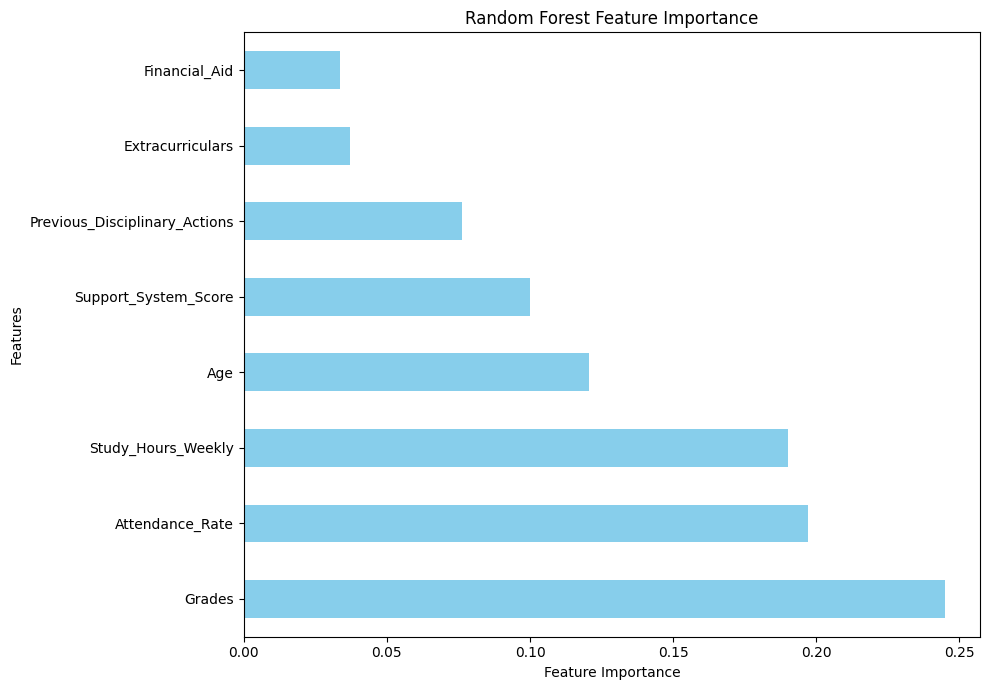

Feature importance bar chart generated.


In [7]:
import matplotlib.pyplot as plt

# 1. Extract feature importances
feature_importances = rf_classifier.feature_importances_

# 2. Get feature names
feature_names = X_train.columns

# 3. Create a Pandas Series for better handling and sorting
feature_importance_df = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

# 4. Create a bar chart
plt.figure(figsize=(10, 7))
feature_importance_df.plot(kind='barh', color='skyblue')

# 5. Add title and labels
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')

# 6. Use tight_layout and show plot
plt.tight_layout()
plt.show()
print("Feature importance bar chart generated.")

## Hypothetical Model Deployment

### Subtask:
Demonstrate a hypothetical 'deployment' by saving the trained model and creating a function to make predictions on new, unseen student data, showcasing how the model would be used in a real-world scenario.


**Reasoning**:
To simulate model deployment, I need to save the trained Random Forest model and then create a function that loads this saved model to make predictions on new, unseen data, as per the instructions. This involves using `joblib` for serialization and defining a prediction function.



In [8]:
import joblib
import pandas as pd

# 1. Save the trained rf_classifier model
model_filename = 'random_forest_model.joblib'
joblib.dump(rf_classifier, model_filename)
print(f"Trained model saved to '{model_filename}'")

# 2. Define a function to make predictions on new student data
def predict_dropout(new_student_data):
    # Load the trained model
    loaded_model = joblib.load(model_filename)

    # Convert new_student_data dictionary to a pandas DataFrame
    # Ensure column order matches the training data (X_train.columns)
    new_student_df = pd.DataFrame([new_student_data], columns=X_train.columns)

    # Make a prediction
    prediction = loaded_model.predict(new_student_df)

    return prediction[0]

# 3. Test the predict_dropout function with a sample of new student data
sample_new_student = {
    'Age': 19,
    'Grades': 1.5,
    'Attendance_Rate': 0.6,
    'Study_Hours_Weekly': 5,
    'Financial_Aid': 0,
    'Extracurriculars': 0,
    'Support_System_Score': 2,
    'Previous_Disciplinary_Actions': 1
}

print("\nSample new student data:")
for key, value in sample_new_student.items():
    print(f"  {key}: {value}")

predicted_dropout = predict_dropout(sample_new_student)

if predicted_dropout == 1:
    print("\nPredicted Dropout Status: This student is predicted to dropout.")
else:
    print("\nPredicted Dropout Status: This student is predicted NOT to dropout.")


Trained model saved to 'random_forest_model.joblib'

Sample new student data:
  Age: 19
  Grades: 1.5
  Attendance_Rate: 0.6
  Study_Hours_Weekly: 5
  Financial_Aid: 0
  Extracurriculars: 0
  Support_System_Score: 2
  Previous_Disciplinary_Actions: 1

Predicted Dropout Status: This student is predicted NOT to dropout.
